In [1]:
import pandas as pd
# Read the data set
msroom = pd.read_csv('G:\My Study\Springboard\Projects\Capstone1\Data\mushrooms.csv')
msroom.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
# Find out where the missing values exist
for column in msroom.columns:
    print(column,':', msroom[column].unique())

class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [3]:
# Find out the amount of the missing values
msroom['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [4]:
# All the data in the 'veil-type' column share the same 'p=partial' value, the column would not be helpful at all.
msroom['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [5]:
# Drop the non-helpful column
df = msroom.drop('veil-type', 1)

# Replace the missing values with the values of the previous row
import numpy as np
df['stalk-root'] = df['stalk-root'].replace('?',method='ffill')
df['stalk-root'].value_counts()


b    5207
c    1605
e    1120
r     192
Name: stalk-root, dtype: int64

In [6]:
# Seperate the data set into input variables(X_df), and target variables(y_df)
y_df = df['class']
X_df = df.drop('class',1)

# Convert the categorical values into 0/1's 
X = pd.get_dummies(X_df,drop_first=True)
y = pd.get_dummies(y_df, drop_first=True)
# Turn y into a 1-d array
y = np.ravel(y)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Split the data set into training set and test set, the size of the test set is 1/5 of the original data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [8]:
# The SVM method
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.983 (+/-0.007) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.919 (+/-0.018) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.993 (+/-0.008) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.006) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
1.000 (+/-0.001) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.993 (+/-0.008) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
1.000 (+/-0.001) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
1.000 (+/-0.001) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
1.000 (+/-0.001) for {'C': 1, 'kernel': 'linear'}
1.000 (+/-0.001) for {'C': 10, 'kernel': 'linear'}
1.000 (+/-0.001) for {'C': 100, 'kernel': 'linear'}
1.000 (+/-0.001) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed

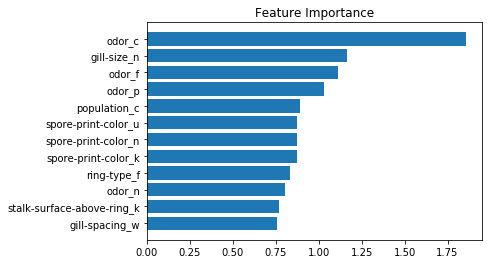

In [42]:
# Examine the featrue importance
import matplotlib.pyplot as plt
import numpy as np

# Using the coef_ attribute as the ranking of the feature importance
# Define a function that will show the most 12 important features
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(12), imp[-13:-1], align='center')
    plt.yticks(range(12), names[-13:-1])
    plt.title('Feature Importance')
    plt.show()
    
features_names = X_train.columns.tolist()
svc = SVC(C=1000, kernel='linear')
svc.fit(X_train, y_train)

scoef = np.abs(svc.coef_[0,:])

f_importances(scoef, features_names)


As it can be seen, under the linear SVM algorithm, the most important fearturs include 'odor' and 'spore-print-color', which is partially consistant with the chi-square test. 

In [10]:
# The Naive Bayes method
# Set the parameters by cross-validation
tuned_parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10]}
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(MultinomialNB(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'alpha': 0.0001}

Grid scores on development set:

0.997 (+/-0.003) for {'alpha': 0.0001}
0.996 (+/-0.003) for {'alpha': 0.001}
0.993 (+/-0.005) for {'alpha': 0.01}
0.982 (+/-0.013) for {'alpha': 0.1}
0.958 (+/-0.018) for {'alpha': 1}
0.941 (+/-0.014) for {'alpha': 10}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       820
          1       1.00      1.00      1.00       805

avg / total       1.00      1.00      1.00      1625


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'alpha': 0.0001}

Grid scores on development set:

0.997 (+/-0.002) for {'alpha': 0.0001}
0.996 (+/-0.003) for {'alpha': 0.001}
0.993 (+/-0.005) for {'alpha': 0.01}
0.981 (+/-0.014) for {'alpha': 0.1}
0

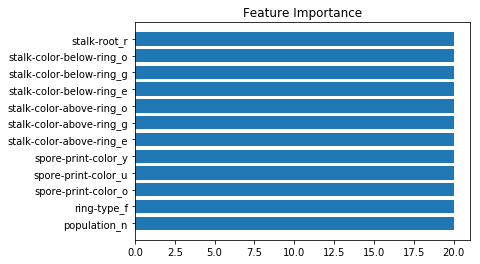

In [43]:
mnb = MultinomialNB(alpha=0.0001)
mnb.fit(X_train, y_train)

mcoef = np.abs(mnb.coef_[0,:])
f_importances(mcoef, features_names)


The most important feature under Naive Bayes algorithm differs from the SVM algorithm, but 'spore-print-color' still presents as one of the most important features, as it does in the SVM and the chi square test.